<a href="https://colab.research.google.com/github/athil1116/Email-Spam-Prediction-using-NLP/blob/main/email_spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df1=pd.read_csv('/content/drive/MyDrive/Datasets/SMS_train.csv',encoding="ISO-8859-1")
df1

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
952,953,hows my favourite person today? r u workin har...,Non-Spam
953,954,How much you got for cleaning,Non-Spam
954,955,Sorry da. I gone mad so many pending works wha...,Non-Spam
955,956,Wat time ü finish?,Non-Spam


In [2]:
df2=pd.read_csv('/content/drive/MyDrive/Datasets/SMS_test.csv',encoding="ISO-8859-1")
df2

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam
3,4,URGENT! Your Mobile number has been awarded wi...,Spam
4,5,Someone has contacted our dating service and e...,Spam
...,...,...,...
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [3]:
df=pd.concat([df1,df2],axis=0,ignore_index=True)
df

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
1077,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
1078,122,Try to do something dear. You read something f...,Non-Spam
1079,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
1080,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [4]:
df.drop(['S. No.'],axis=1,inplace=True)
df

,Message_body,Label
0,Rofl. Its true to its name,Non-Spam
1,The guy did some bitching but I acted like i'd...,Non-Spam
2,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,Will ü b going to esplanade fr home?,Non-Spam
4,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...
1077,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
1078,Try to do something dear. You read something f...,Non-Spam
1079,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
1080,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [5]:
df['Label']=df['Label'].map({'Non-Spam':0,'Spam':1})

In [6]:
df

,Message_body,Label
0,Rofl. Its true to its name,0
1,The guy did some bitching but I acted like i'd...,0
2,"Pity, * was in mood for that. So...any other s...",0
3,Will ü b going to esplanade fr home?,0
4,This is the 2nd time we have tried 2 contact u...,1
...,...,...
1077,7 wonders in My WORLD 7th You 6th Ur style 5th...,0
1078,Try to do something dear. You read something f...,0
1079,Sun ah... Thk mayb can if dun have anythin on....,0
1080,"SYMPTOMS when U are in love: ""1.U like listeni...",0


<Axes: xlabel='Label', ylabel='count'>

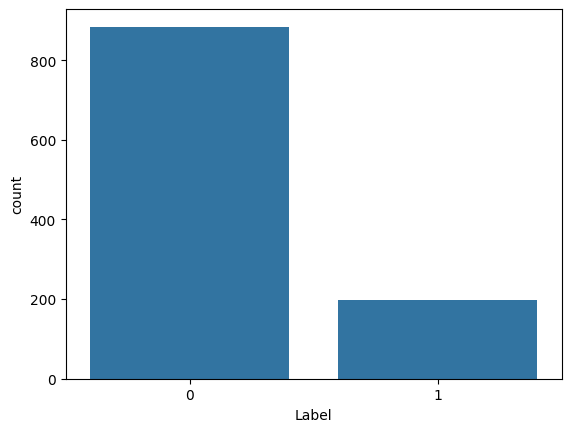

In [7]:
import seaborn as sns
sns.countplot(x='Label',data=df)

In [8]:
msg=df.Message_body
msg

,Message_body
0,Rofl. Its true to its name
1,The guy did some bitching but I acted like i'd...
2,"Pity, * was in mood for that. So...any other s..."
3,Will ü b going to esplanade fr home?
4,This is the 2nd time we have tried 2 contact u...
...,...
1077,7 wonders in My WORLD 7th You 6th Ur style 5th...
1078,Try to do something dear. You read something f...
1079,Sun ah... Thk mayb can if dun have anythin on....
1080,"SYMPTOMS when U are in love: ""1.U like listeni..."


In [9]:
msg=msg.str.replace('[^a-zA-Z0-9]+'," ")
msg

,Message_body
0,Rofl. Its true to its name
1,The guy did some bitching but I acted like i'd...
2,"Pity, * was in mood for that. So...any other s..."
3,Will ü b going to esplanade fr home?
4,This is the 2nd time we have tried 2 contact u...
...,...
1077,7 wonders in My WORLD 7th You 6th Ur style 5th...
1078,Try to do something dear. You read something f...
1079,Sun ah... Thk mayb can if dun have anythin on....
1080,"SYMPTOMS when U are in love: ""1.U like listeni..."


In [10]:
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
msg=msg.apply(lambda x:[stemmer.stem(i.lower()) for i in word_tokenize(x)]).apply(lambda x:" ".join(x))
msg

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,Message_body
0,rofl . it true to it name
1,the guy did some bitch but i act like i 'd be ...
2,"piti , * was in mood for that . so ... ani oth..."
3,will ü b go to esplanad fr home ?
4,this is the 2nd time we have tri 2 contact u. ...
...,...
1077,7 wonder in my world 7th you 6th ur style 5th ...
1078,tri to do someth dear . you read someth for exam
1079,sun ah ... thk mayb can if dun have anythin on...
1080,symptom when u are in love : `` 1.u like liste...


In [11]:
msg

,Message_body
0,rofl . it true to it name
1,the guy did some bitch but i act like i 'd be ...
2,"piti , * was in mood for that . so ... ani oth..."
3,will ü b go to esplanad fr home ?
4,this is the 2nd time we have tri 2 contact u. ...
...,...
1077,7 wonder in my world 7th you 6th ur style 5th ...
1078,tri to do someth dear . you read someth for exam
1079,sun ah ... thk mayb can if dun have anythin on...
1080,symptom when u are in love : `` 1.u like liste...


In [12]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=stopwords.words('english')
msg=msg.apply(lambda x:[i for i in word_tokenize(x) if i not in stop]).apply(lambda x:" ".join(x))
msg

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Message_body
0,rofl . true name
1,guy bitch act like 'd interest buy someth els ...
2,"piti , * mood . ... ani suggest ?"
3,ü b go esplanad fr home ?
4,2nd time tri 2 contact u. u £750 pound prize ....
...,...
1077,7 wonder world 7th 6th ur style 5th ur smile 4...
1078,tri someth dear . read someth exam
1079,sun ah ... thk mayb dun anythin ... thk book e...
1080,symptom u love : `` 1.u like listen song 2.u g...


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorize=TfidfVectorizer()
x=vectorize.fit_transform(msg)
X=x.toarray()

In [14]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
y=df['Label']
y

,Label
0,0
1,0
2,0
3,0
4,1
...,...
1077,0
1078,0
1079,0
1080,0


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
knn=KNeighborsClassifier(n_neighbors=5)
rfc=RandomForestClassifier(random_state=2)
sv=SVC()
mnb=MultinomialNB()
lst=[knn,rfc,sv,mnb]
for model in lst:
  print("****************************",model,"*****************************")
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))

**************************** KNeighborsClassifier() *****************************
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       177
           1       1.00      0.07      0.14        40

    accuracy                           0.83       217
   macro avg       0.91      0.54      0.52       217
weighted avg       0.86      0.83      0.76       217

**************************** RandomForestClassifier(random_state=2) *****************************
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       177
           1       1.00      0.75      0.86        40

    accuracy                           0.95       217
   macro avg       0.97      0.88      0.91       217
weighted avg       0.96      0.95      0.95       217

**************************** SVC() *****************************
              precision    recall  f1-score   support

           0       0.90      1.00      0.95   

In [18]:
rfc=RandomForestClassifier(random_state=2)
rfc.fit(X_train,y_train)
y_new=rfc.predict(X_test)
print(classification_report(y_test,y_new))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       177
           1       1.00      0.75      0.86        40

    accuracy                           0.95       217
   macro avg       0.97      0.88      0.91       217
weighted avg       0.96      0.95      0.95       217



In [19]:
X.shape

(1082, 3058)

In [20]:
y.shape

(1082,)

In [21]:
X_train.shape

(865, 3058)